In [17]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm

import scipy
from scipy import stats


In [2]:
data = pd.read_csv("/Users/victoriaguo/Desktop/DS 4002/project2/final_data.csv")

In [3]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    360 non-null    int64  
 1   Security Description          360 non-null    object 
 2   Record Date                   360 non-null    object 
 3   Average Interest Rate Amount  360 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 11.4+ KB


In [4]:
# convert dates to datetime objects
data['Record Date'] = [datetime.strptime(date, "%m/%d/%y") for date in data['Record Date']]

In [5]:
# convert dates to ordinal values 
data['Record Date'] = [date.toordinal() for date in data['Record Date']]

In [6]:
data.head()

,Unnamed: 0,Security Description,Record Date,Average Interest Rate Amount
0,0,Treasury Bills,738916,5.411
1,1,Treasury Notes,738916,2.340
2,2,Treasury Bonds,738916,3.106
3,17,Treasury Bills,738885,5.437
4,18,Treasury Notes,738885,2.272


In [7]:
# create linear regression model for bonds
bonds_bool = data['Security Description'] == 'Treasury Bonds'

bonds = data[bonds_bool]

# convert to numpy arrays 
X_bonds = np.array(bonds['Average Interest Rate Amount']).reshape(-1, 1)  # Dates
y_bonds = np.array(bonds['Record Date']) 

# create linear model 
model_bonds = LinearRegression()

# fit model to data 
model_bonds.fit(X_bonds, y_bonds)

y_pred_bonds = model_bonds.predict(X_bonds)


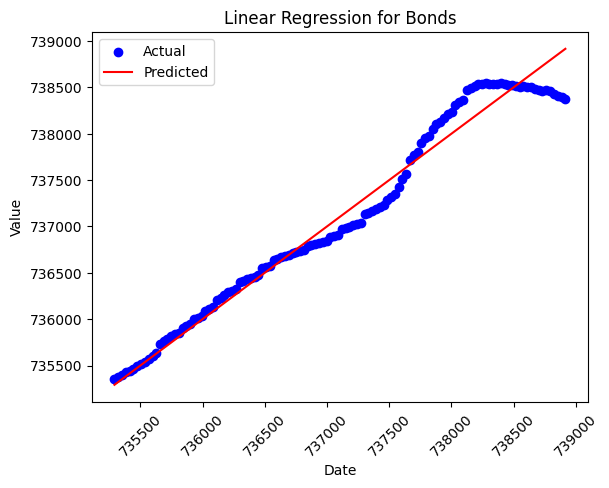

In [8]:
# create plot for bonds
plt.scatter(bonds['Record Date'], y_pred_bonds, color='blue', label='Actual')
plt.plot(bonds['Record Date'], y_bonds, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Linear Regression for Bonds')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [9]:
# get coefficients for linear regression model 
slope = model_bonds.coef_[0]
intercept = model_bonds.intercept_

print("slope=", slope)
print("intercept=", intercept)

slope= -1562.0080412678299
intercept= 743226.2327339469


In [20]:
# get significance level for bonds

X_bonds = sm.add_constant(X_bonds)

model_bonds2 = sm.OLS(y_bonds, X_bonds).fit()

print(model_bonds2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     4261.
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           1.86e-94
Time:                        20:58:29   Log-Likelihood:                -788.72
No. Observations:                 120   AIC:                             1581.
Df Residuals:                     118   BIC:                             1587.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.432e+05     95.132   7812.543      0.0

In [10]:
# create linear regression model for bills

bills_bool = data['Security Description'] == 'Treasury Bills'

bills = data[bills_bool]

# convert to numpy arrays 
X_bills = np.array(bills['Average Interest Rate Amount']).reshape(-1, 1)  # Dates
y_bills = np.array(bills['Record Date']) 

# create linear model 
model_bills = LinearRegression()

# fit model to data 
model_bills.fit(X_bills, y_bills)

y_pred_bills = model_bills.predict(X_bills)

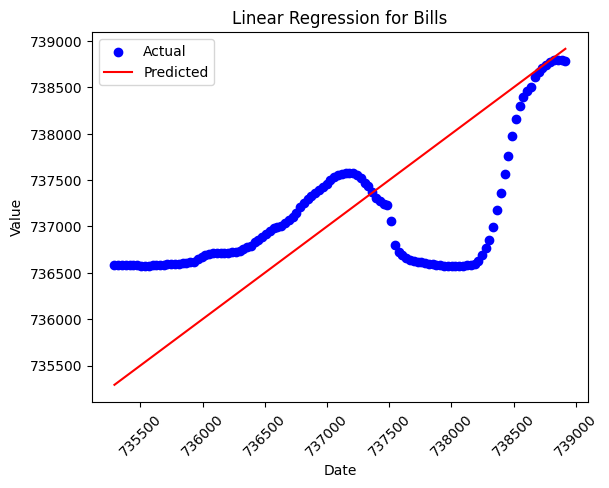

In [11]:
# create plots for bills
plt.scatter(bonds['Record Date'], y_pred_bills, color='blue', label='Actual')
plt.plot(bonds['Record Date'], y_bills, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Linear Regression for Bills')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [12]:
# get coefficients for linear regression model 
slope = model_bills.coef_[0]
intercept = model_bills.intercept_

print("slope=", slope)
print("intercept=", intercept)

slope= 411.9029418992045
intercept= 736554.3110995991


In [18]:
# get significance level 

X_bills = sm.add_constant(X_bills)

model_bill2 = sm.OLS(y_bills, X_bills).fit()

print(model_bill2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     72.12
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           7.04e-14
Time:                        20:57:03   Log-Likelihood:                -976.94
No. Observations:                 120   AIC:                             1958.
Df Residuals:                     118   BIC:                             1963.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.366e+05    100.186   7351.833      0.0

In [13]:
# create linear regression model for notes

notes_bool = data['Security Description'] == 'Treasury Notes'

notes = data[notes_bool]

# convert to numpy arrays 
X_notes = np.array(notes['Average Interest Rate Amount']).reshape(-1, 1)  # Dates
y_notes = np.array(notes['Record Date']) 

# create linear model 
model_notes = LinearRegression()

# fit model to data 
model_notes.fit(X_notes, y_notes)

y_pred_notes = model_notes.predict(X_notes)

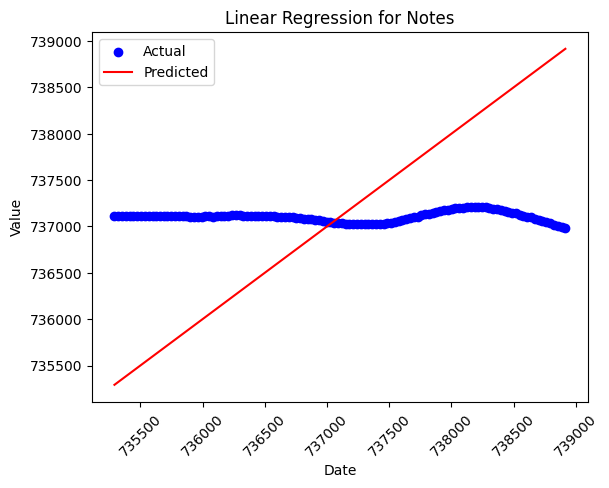

In [14]:
# create plot for notes
plt.scatter(bonds['Record Date'], y_pred_notes, color='blue', label='Actual')
plt.plot(bonds['Record Date'], y_notes, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Linear Regression for Notes')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [15]:
slope = model_notes.coef_[0]
intercept = model_notes.intercept_

print("slope=", slope)
print("intercept=", intercept)

slope= -245.5959776570476
intercept= 737557.0617203526


In [19]:
# get significance level 

X_notes = sm.add_constant(X_notes)

model_notes2 = sm.OLS(y_notes, X_notes).fit()

print(model_notes2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.2944
Date:                Sat, 02 Mar 2024   Prob (F-statistic):              0.588
Time:                        20:57:45   Log-Likelihood:                -1005.4
No. Observations:                 120   AIC:                             2015.
Df Residuals:                     118   BIC:                             2020.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.376e+05    840.548    877.472      0.0